# Plot mapping rates between gencode.32.v.1.index and gen.32.ucsc.rmsk.index  other

In [1]:
from   bme263DataVis.utilities import MatPlotLibUtilities
# import argparse
#import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
# import matplotlib.patches as mplpatches
# import numpy as np
# import sys
#lt.style.use('BME163')
import pandas as pd
from pathlib import Path
# pd.set_option('display.max_colwidth', -1)

In [2]:
mplu = MatPlotLibUtilities()
mplu.loadStyle() # load our custom matplotlib style settings

dataDir = Path("../data")
dataFile = "salmonLogMetaData.tsv"
dataPath = dataDir.joinpath(dataFile)
assert dataPath.exists()

imgOutputDir = Path("./img")
imgOutputDir.mkdir(exist_ok=True)

# load data, clean, and select data

In [3]:
mappingRateDF = pd.read_csv(dataPath, sep="\t", header=1)
mappingRateDF.head()

,sampleName,mappingRate,salmonOut,mapped,unmapped,d,u,m1,m2,m12,index,mate1,mate2
0,kras.ipsc/data/bulk.data/day.5/ctrl.1,91.6316,locus.te.combined.salmon.out,Na,Na,Na,Na,Na,Na,Na,/public/groups/kimlab/indexes/gen.32.ucsc.rmsk...,output_forward_paired.fq.gz,output_reverse_paired.fq.gz
1,kras.ipsc/data/bulk.data/day.5/ctrl.1,91.6315,gencode.te.locus.salmon.out,Na,Na,Na,Na,Na,Na,Na,/public/groups/kimlab/indexes/gen.32.ucsc.rmsk...,output_forward_paired.fq.gz,output_reverse_paired.fq.gz
2,kras.ipsc/data/bulk.data/day.5/ctrl.1,90.1188,gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx,26301125,2452342,1016976,1307960,78421,48985,0,/scratch/aedavids/sel.align.gencode.v35.ucsc.r...,/private/groups/kimlab/kras.ipsc/data/bulk.dat...,/private/groups/kimlab/kras.ipsc/data/bulk.dat...
3,kras.ipsc/data/bulk.data/day.5/ctrl.1,89.2505,gencode.salmon.out,Na,Na,Na,Na,Na,Na,Na,/public/groups/kimlab/indexes/gencode.32.v.1.i...,output_forward_paired.fq.gz,output_reverse_paired.fq.gz
4,kras.ipsc/data/bulk.data/day.5/ctrl.2,93.5036,gencode.te.locus.salmon.out,Na,Na,Na,Na,Na,Na,Na,/public/groups/kimlab/indexes/gen.32.ucsc.rmsk...,output_forward_paired.fq.gz,output_reverse_paired.fq.gz


In [4]:
mappingRateDF["sampleName"] = mappingRateDF["sampleName"].str.replace(r'kras.ipsc/data/', '')
# print( mappingRateDF["sampleName"].head() )
# print( mappingRateDF["sampleName"].tail() )

/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [5]:
mappingRateDF["sampleName"] = mappingRateDF["sampleName"].str.replace(r'.data', '')
# print( mappingRateDF["sampleName"].head() )
# print( mappingRateDF["sampleName"].tail() )

/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [6]:
mappingRateDF["sampleName"] = mappingRateDF["sampleName"].str.replace(r'gen1c.', '')
# print( mappingRateDF["sampleName"].head() )
# print( mappingRateDF["sampleName"].tail() )

/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
mappingRateDF["sampleName"] = mappingRateDF["sampleName"].str.replace(r'.exo.input', '')
# print( mappingRateDF["sampleName"].head() )
# print( mappingRateDF["sampleName"].tail() )

/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [8]:
s1 = 'gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx'
s2 = "gencode.te.locus.salmon.out"
regex = s1 + "|" + s2
print( regex )
selectRows = mappingRateDF.loc[:, "salmonOut"].str.contains(regex, regex=True)

gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx|gencode.te.locus.salmon.out


In [9]:
boxData1 = mappingRateDF.loc[selectRows,:]
# boxData1.head()

In [10]:
# boxData1.tail()

In [11]:
# strip of the replicant id 
boxData1['gBySample'] = boxData1["sampleName"].str.replace(r'\..?$', '')
boxData2 = boxData1[["gBySample", "mappingRate", "salmonOut"]]
# boxData2.head()

/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/andrewdavidson/anaconda3/envs/extraCellularRNA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# boxData2.tail()

In [13]:
groupedDF = boxData2.groupby(["gBySample", "salmonOut"])
# for key, gDF in groupedDF:
#     #gDF = groupedDF.get_group(key)
#     #print( type(item))
#     print("\n*********")    
#     print(key)
#     print(gDF.loc[:, [ "gBySample", "mappingRate", "salmonOut" ]])


## plot
[box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

[box plot demo](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html)

In [14]:
def createPanel():
    figureWidthInInches = 8
    figureHeightInInches = 3
    fig = plt.figure(figsize=(figureWidthInInches,figureHeightInInches))
    panel = mplu.createPanelSameSizeAsFig(fig)
    return panel

def createFigureAndPanel(widthInInches=8, heightInInches=3):
    '''
    makes it possible to write model evaluation function that genertes
    multiple images with out having to save images to disk
    '''
    fig = plt.figure(figsize=(widthInInches, heightInInches))
    panel = mplu.createPanelSameSizeAsFig(fig)
    return (fig, panel)

In [15]:
keys = []
data = []
for key, gDF in groupedDF:
#     keys.append( key )
#     data.append( gDF["mappingRate"] )
    prependIdx = 0
    keys.insert( prependIdx, key )
    data.insert( prependIdx, gDF["mappingRate"] )

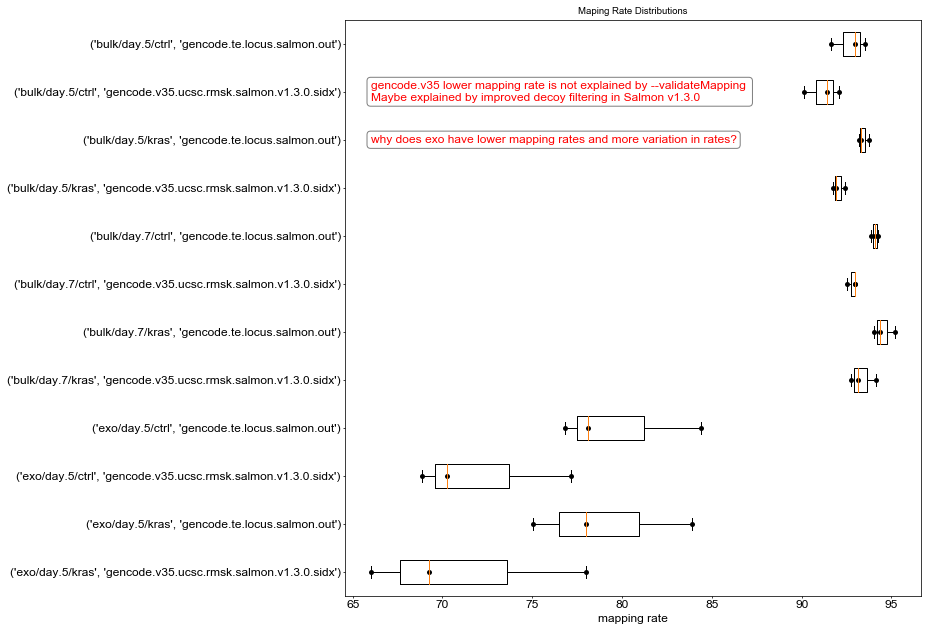

In [16]:
fig, panel = createFigureAndPanel(heightInInches = 8)
panel.boxplot(data, vert=False)
panel.set_yticklabels( keys )
for i in range(len(keys)):
    y = i + 1
    df = data[i]
    for x in df:
        #print("x:{} y:{}".format(x,y))
        panel.plot(x, y, linewidth=0, marker='o', alpha=1,
                   markersize=5, markeredgewidth=0, markerfacecolor='black')
    
panel.set_xlabel("mapping rate", fontsize=12 )
panel.tick_params(axis='x', labelsize=12)
panel.tick_params(axis='y', labelsize=12)

panel.set_title("Maping Rate Distributions")

# str="lower mapping rate between different references \n"\
#     + "is not explained by either salmon version \n"\
#     + "or --validateMapping"

str = "gencode.v35 lower mapping rate is not explained by --validateMapping \n"\
    + "Maybe explained by improved decoy filtering in Salmon v1.3.0 "
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
panel.text( 66, 11, str, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
           bbox=props, color="red" )

str="why does exo have lower mapping rates and more variation in rates?"
panel.text( 66, 10, str, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
           bbox=props, color="red" )

outfile="img/mappingRateDistributions.png"
fig.savefig(outfile, dpi=300, bbox_inches='tight')  # BME163 style sheet should set dpi=600